In [22]:
def plot_keywords_per_job_title(position, keywords = None):
    """
    This code will yara yara lorem ipsum introduce description

    """
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    import warnings
    warnings.filterwarnings("ignore")
    
    def remove_stop_split(x):
        import re
        """
        This function will have a string as an input, check all the words inside and return a string without
        any of these stopwords, and in lowercase.
        """
        stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
            "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
            "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
            "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
            "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
            "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
            "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at",
            "by", "for", "with", "about", "against", "between", "into", "through", "during",
            "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", 
            "on", "off", "over", "under", "again", "further", "then", "once", "here", "there",
            "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most",
            "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
            "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
        out = []
        descr = re.sub(r'[^\w\s]+'," ",x)
        for word in descr.split():
            if word not in stop:
                out.append(word.lower())
        return out

    #import the data
    data = pd.read_csv('export_usa.csv')
    
    #create a list with the words inputted as job title 
    position_words = position.lower().replace("data"," ").strip().split()
    
    #If any of the words in the position list is in the data, this new column will be return true, to create a reduced dataset
    data['pos-in-data'] =[True if all (word in position for word in position_words) else False for position in data['pos_clean'] ]
    reduced_data = data[data['pos-in-data']]
    
    #then we remove stopwords and make a new column with list of meaningful words for each job description
    reduced_data['descr_words'] = [remove_stop_split(des) for des in reduced_data['descr_cl']]
    
    # We create a dictionary with the inputted strings, the count, and we calcualte its percentage 
    skills=[]
    count=[]
    percentage=[]
    for skill in keywords:
        skills.append(skill)
        word_check = [True if skill in descr else False for descr in reduced_data['descr_words']]
        count.append(sum (word_check))
        percentage.append(sum(word_check)*100/len(word_check))

    dict = {'Skill': skills, 'Count': count, '% Total': percentage}
    
    
    ##Output?
    num_of_matches = len(reduced_data)
    
    #and we create a dataframe 
    df = pd.DataFrame(dict)
    df = df.sort_values(by=['% Total'],ascending = False)
    df = df.reset_index(drop = True)
    
    fig_title = "Keywords for '"+ position+ "' positions. Found: "+ str(num_of_matches) + " results."

    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.set(font_scale=1.8)  # crazy big
    plt.figure(figsize=(19, 10))
    sns_plot = sns.barplot(y='Skill',x = '% Total', data = df,palette="rocket",).set_title(fig_title)


    fig = sns_plot.get_figure()
    

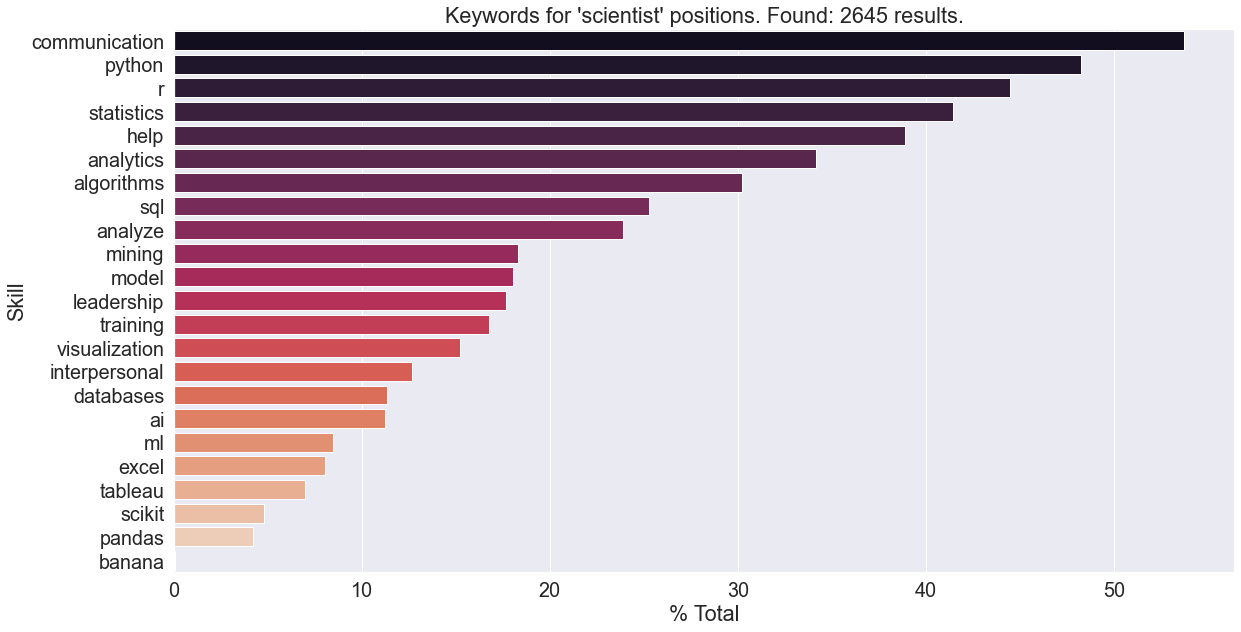

In [25]:
position = "scientist" #input a string 
keywords = ['python','r','statistics','sql','model','ai',
            'mining','tableau','scikit','pandas','ml','banana',
            'excel','visualization','databases','help',
            'algorithms','analytics','interpersonal',
            'analyze','training','communication','leadership']

plot_keywords_per_job_title(position, keywords)